In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = titanic_data.Survived

In [14]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


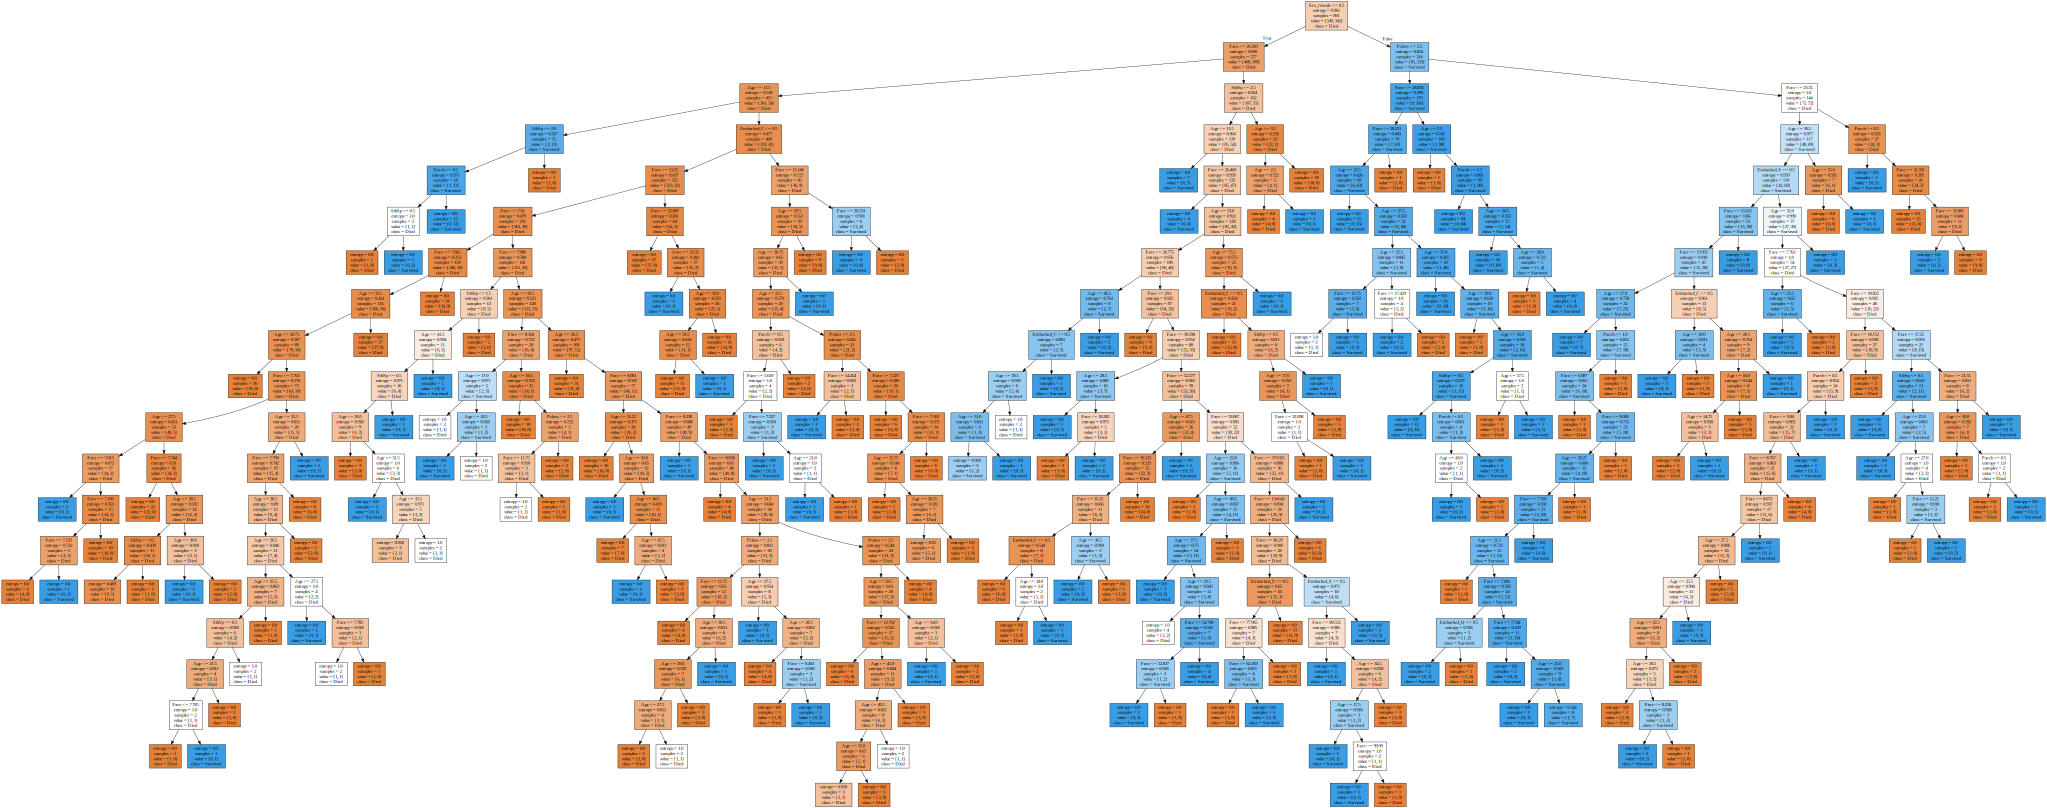

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [41]:
graph.render(filename='titanic_overfitted', format='png')

'titanic_overfitted.png'

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
clf.score(X, y)

0.9797979797979798

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
clf.score(X_test, y_test)

0.7694915254237288

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [17]:
clf.score(X_train, y_train)

0.8825503355704698

In [18]:
clf.score(X_test, y_test)

0.7830508474576271

In [19]:
max_depth_values = range(1, 100)

In [20]:
scores_data = pd.DataFrame()

In [23]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [24]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073


In [25]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score', 'cross_val_score'],
                           var_name = 'set_type', value_name = 'score')

In [26]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [71]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
396,1,cross_val_score,0.781961
397,2,cross_val_score,0.770196
398,3,cross_val_score,0.790322
399,4,cross_val_score,0.788627
400,5,cross_val_score,0.797031
401,6,cross_val_score,0.803754
402,7,cross_val_score,0.797017
403,8,cross_val_score,0.800364
404,9,cross_val_score,0.797003
405,10,cross_val_score,0.798669


<AxesSubplot:xlabel='max_depth', ylabel='score'>

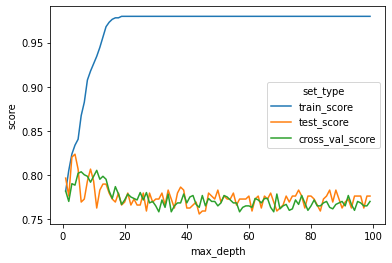

In [27]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

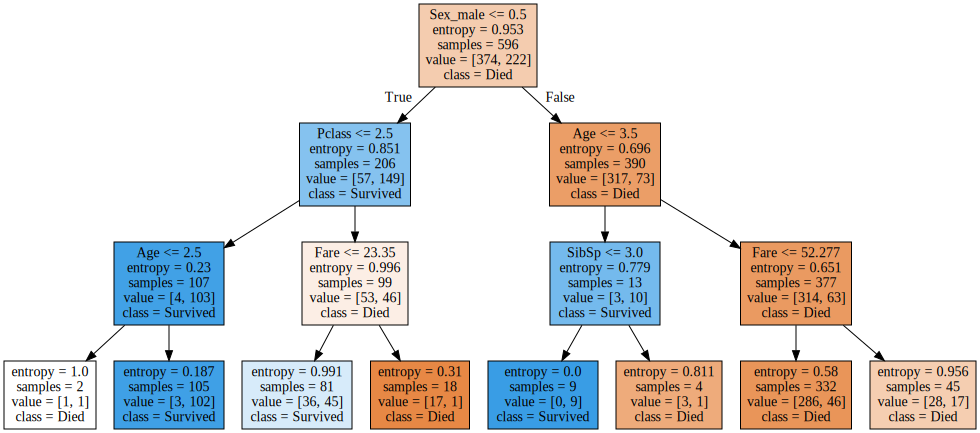

In [46]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [28]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [22]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7864406779661017

In [30]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [31]:
best_clf.score(X_test, y_test)

0.7796610169491526

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
clf = tree.DecisionTreeClassifier()

In [35]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [40]:
grid_Search_CV_clf = GridSearchCV(clf, param_grid=parametrs, cv=5)

In [42]:
grid_Search_CV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [43]:
grid_Search_CV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [44]:
best_clf = grid_Search_CV_clf.best_estimator_

In [46]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [47]:
from sklearn.metrics import precision_score, recall_score

In [49]:
y_pred = best_clf.predict(X_test)

In [50]:
precision_score(y_test, y_pred)

0.8229166666666666

In [51]:
recall_score(y_test, y_pred)

0.6583333333333333

In [54]:
y_predicted_proba = best_clf.predict_proba(X_test)

<AxesSubplot:>

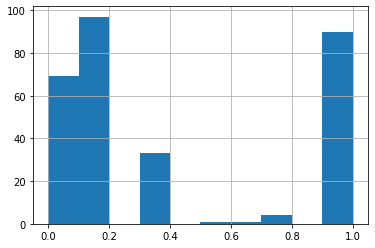

In [57]:
pd.Series(y_predicted_proba[:, 1]).hist()

In [75]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.1, 1, 0)

In [76]:
precision_score(y_test, y_pred)

0.47345132743362833

In [77]:
recall_score(y_test, y_pred)

0.8916666666666667

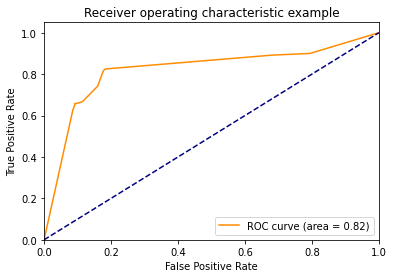

In [78]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()